In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [52]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [53]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [54]:
from llm_toolkit.logical_reasoning_utils import *

In [55]:
model_name = "Llama3.1-70B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [56]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   text                                                                          3000 non-null   object
 1   label                                                                         3000 non-null   object
 2   title                                                                         3000 non-null   object
 3   puzzle                                                                        3000 non-null   object
 4   truth                                                                         3000 non-null   object
 5   shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-70B-Chinese-Chat/c

In [57]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf']

In [58]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                              model  accuracy  \
0     0.0  shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.b...  0.763667   
1     0.2  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.778000   
2     0.4  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.730667   
3     0.6  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.719333   
4     0.8  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.756333   
5     1.0  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.796333   
6     1.2  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.732667   
7     1.4  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.755667   
8     1.6  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.757000   
9     1.8  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.754667   
10    2.0  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.749667   

    precision    recall        f1  ratio_valid_classifications  
0    0.780665  0.763667  0.752581                     0.009667  
1    0.814871  0.778000  0.791081                     0.999667  
2    0.814578  0.730667  0.762472                     1.000000  
3    0.821357  0.719333  0.756070                     1.000000  
4    0.826790  0.756333  0.781516                     1.000000  
5    0.824897  0.796333  0.807687                     1.000000  
6    0.826535  0.732667  0.764442                     1.000000  
7    0.825899  0.755667  0.782041                     1.000000  
8    0.826446  0.757000  0.783450                     1.000000  
9    0.827772  0.754667  0.782358                     1.000000  
10   0.828231  0.749667  0.779195                     1.000000

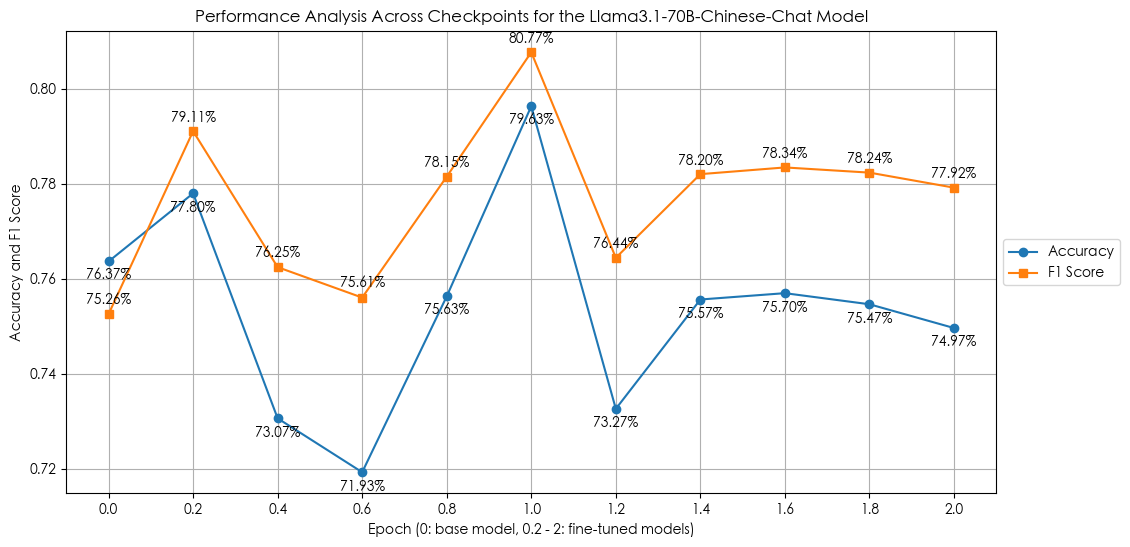

In [59]:
plot_metrics(perf_df, model_name)

In [60]:
perf_df.to_csv(metrics_csv, index=False)

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf
不是。      1961
是。        895
问法错误。      73
回答正确。      26
不重要        20
不重要。       15
回答正确        5
是           4
是男孩。        1
Name: count, dtype: int64


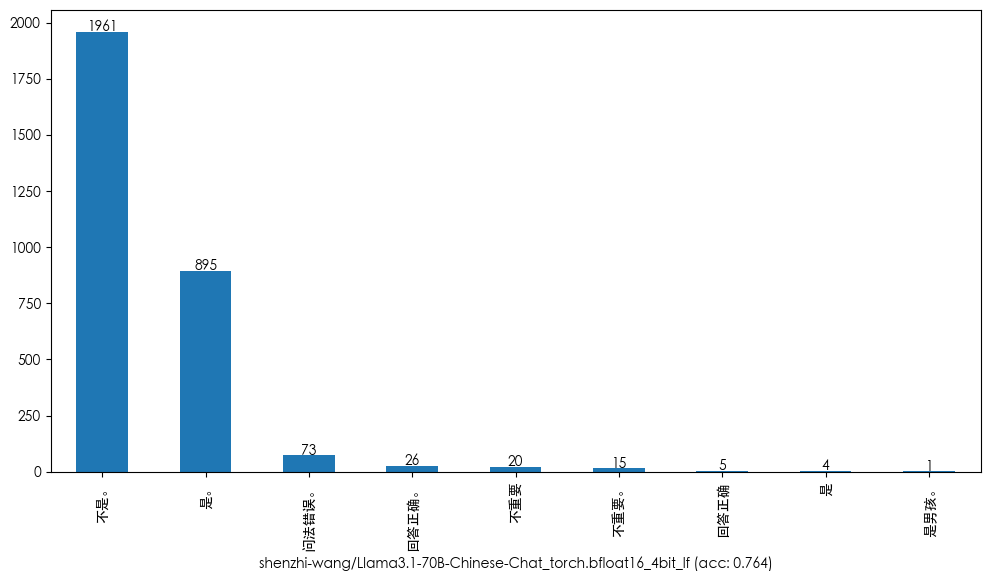

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf
不是      1429
是       1180
不重要      339
回答正确      37
问法错误      14
物品         1
Name: count, dtype: int64


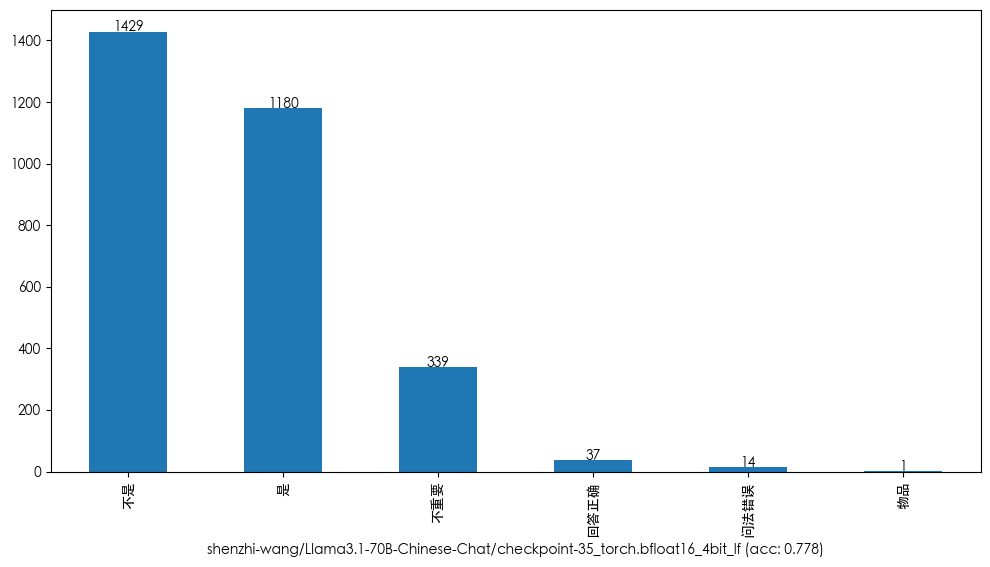

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf
不是      1308
是       1099
不重要      512
问法错误      46
回答正确      35
Name: count, dtype: int64


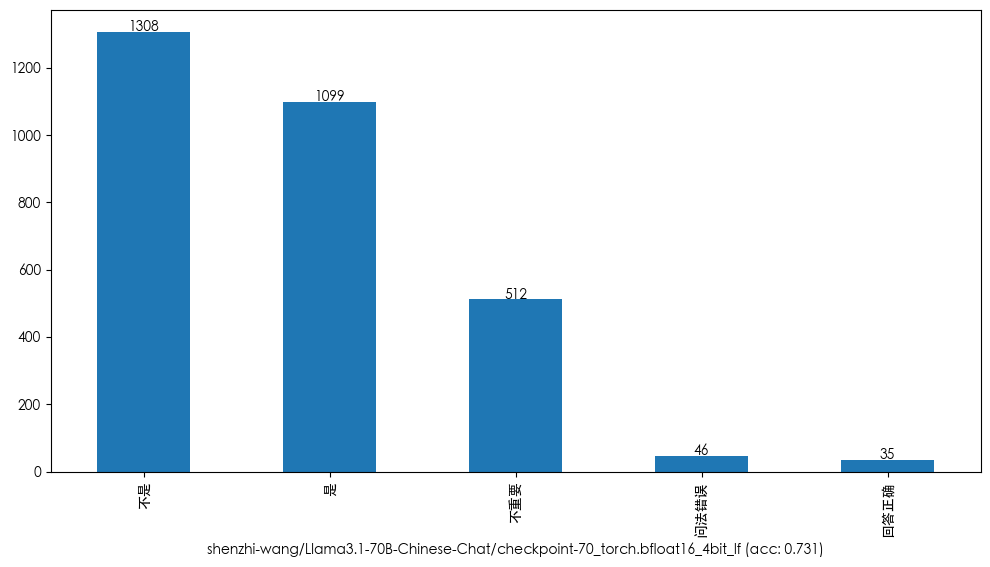

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf
不是      1187
是       1152
不重要      562
问法错误      67
回答正确      32
Name: count, dtype: int64


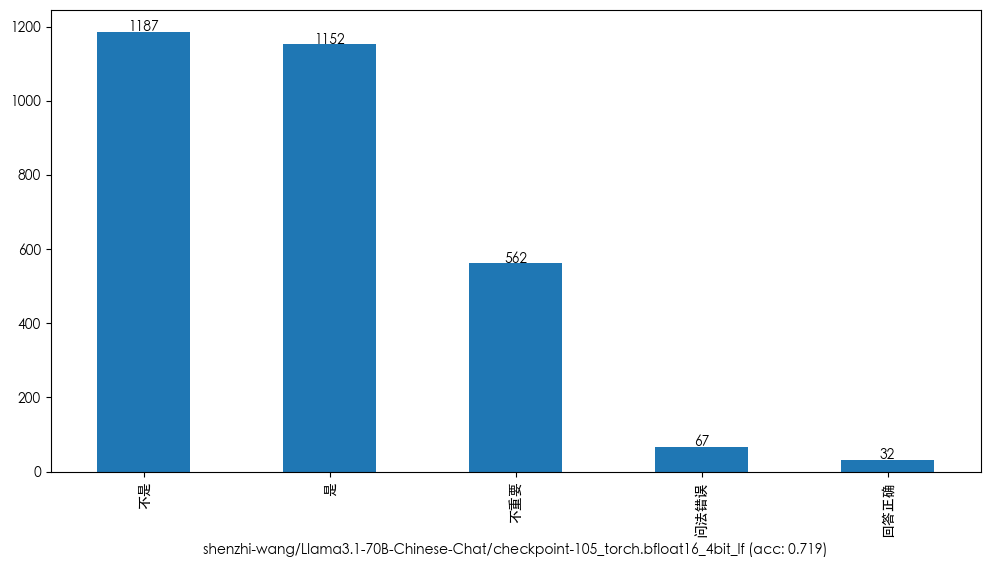

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf
是       1245
不是      1237
不重要      446
问法错误      43
回答正确      29
Name: count, dtype: int64


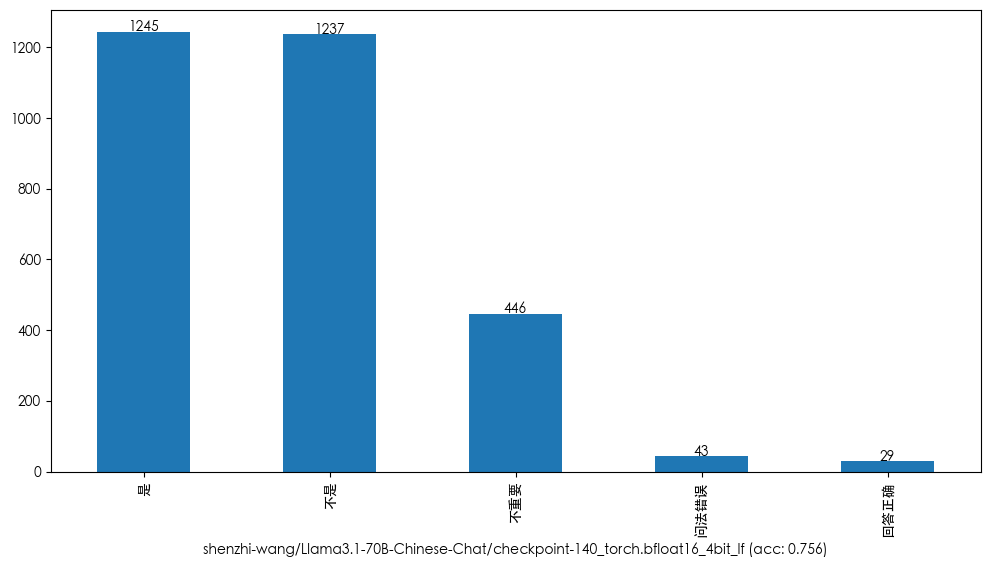

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf
不是      1443
是       1188
不重要      283
问法错误      50
回答正确      36
Name: count, dtype: int64


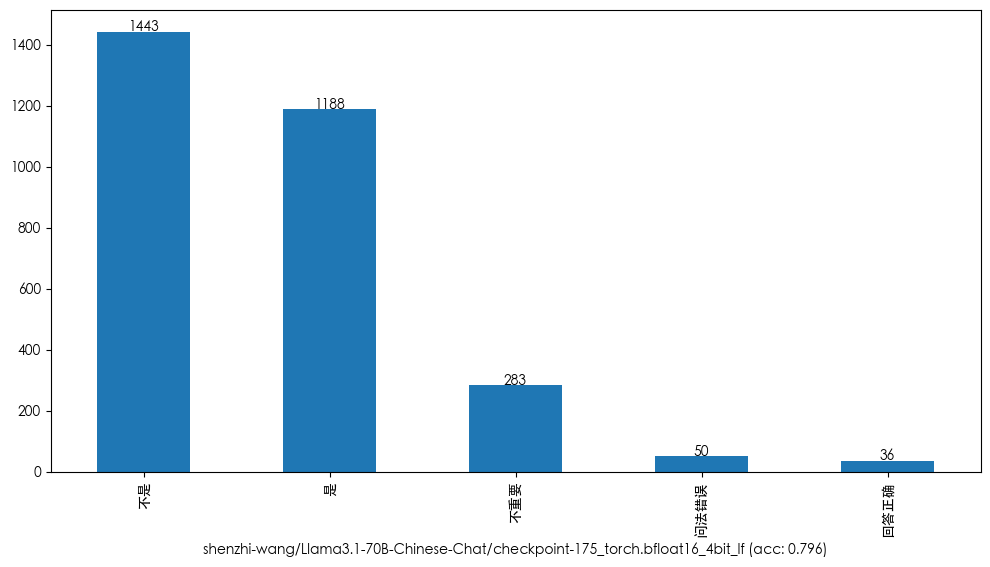

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf
是       1246
不是      1137
不重要      514
问法错误      68
回答正确      35
Name: count, dtype: int64


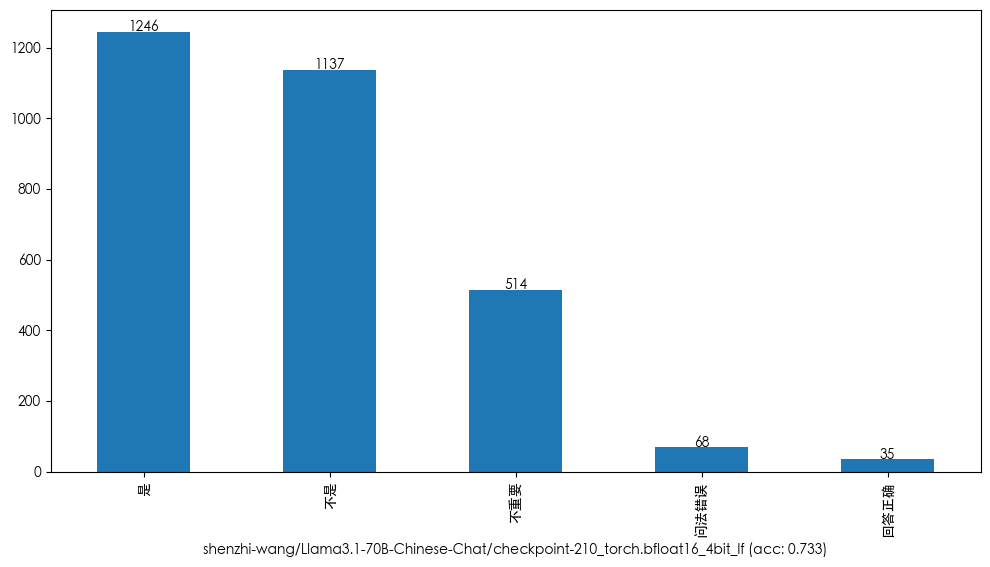

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf
不是      1312
是       1162
不重要      463
问法错误      33
回答正确      30
Name: count, dtype: int64


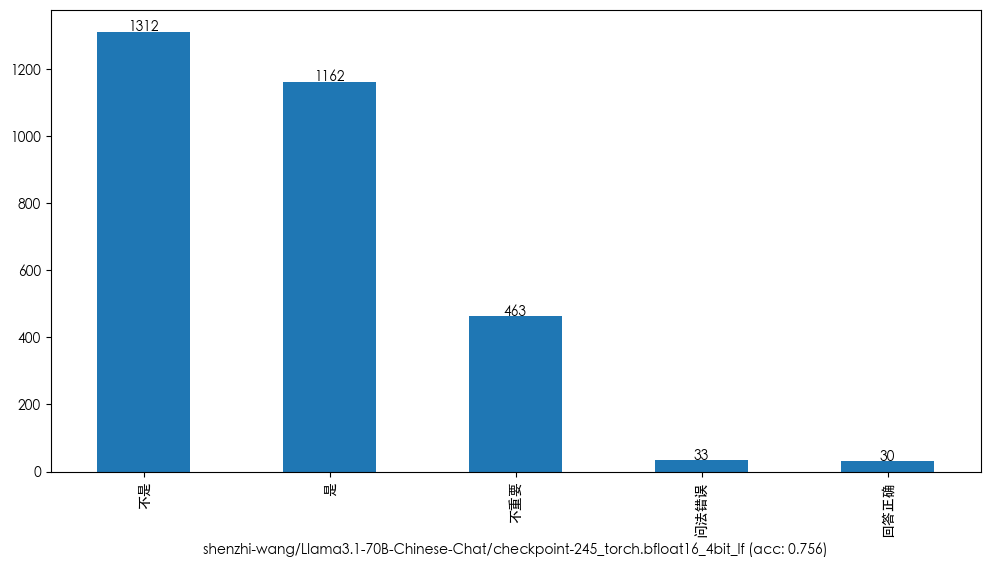

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf
不是      1313
是       1161
不重要      449
问法错误      46
回答正确      31
Name: count, dtype: int64


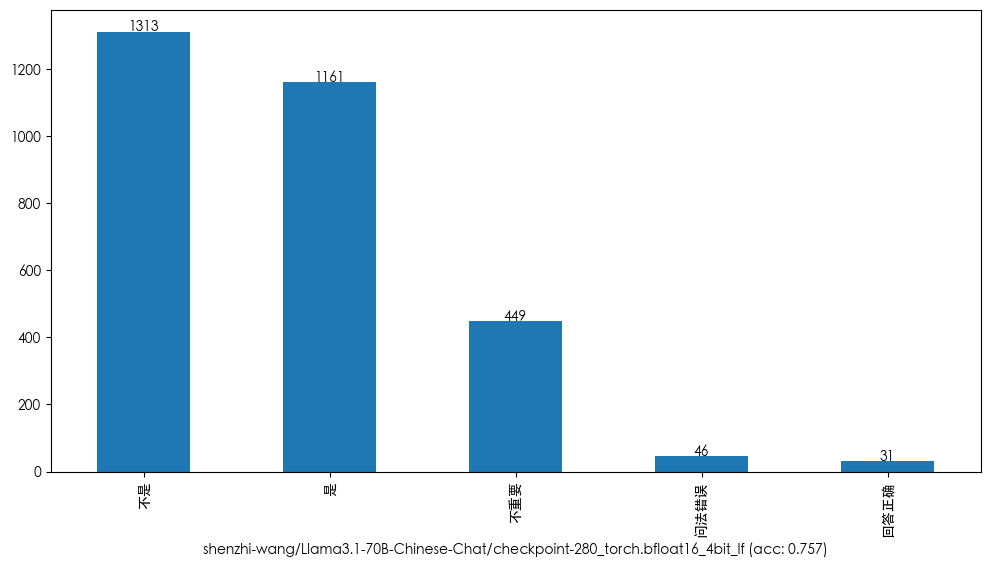

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf
不是      1314
是       1148
不重要      470
问法错误      37
回答正确      31
Name: count, dtype: int64


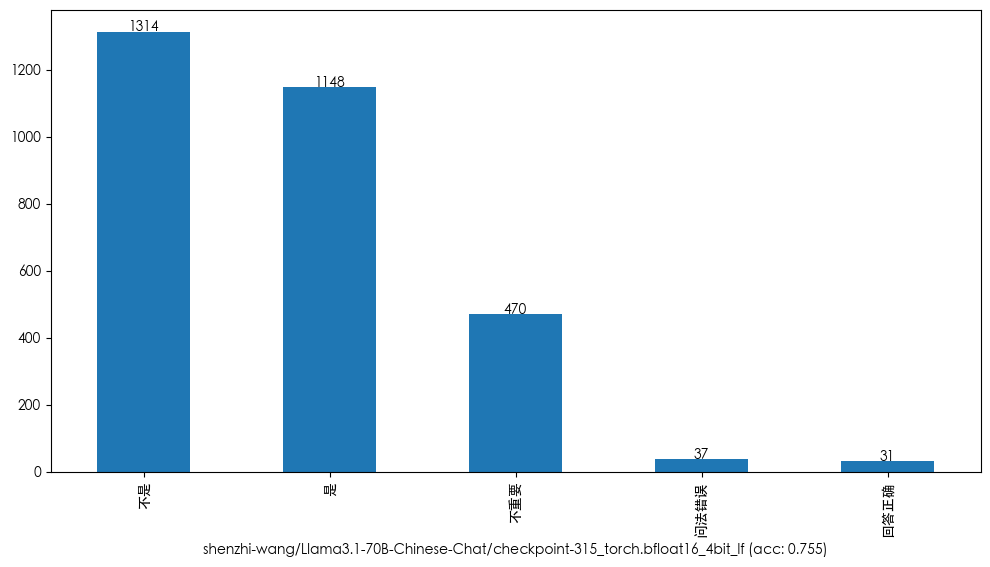

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf
不是      1286
是       1153
不重要      489
问法错误      40
回答正确      32
Name: count, dtype: int64


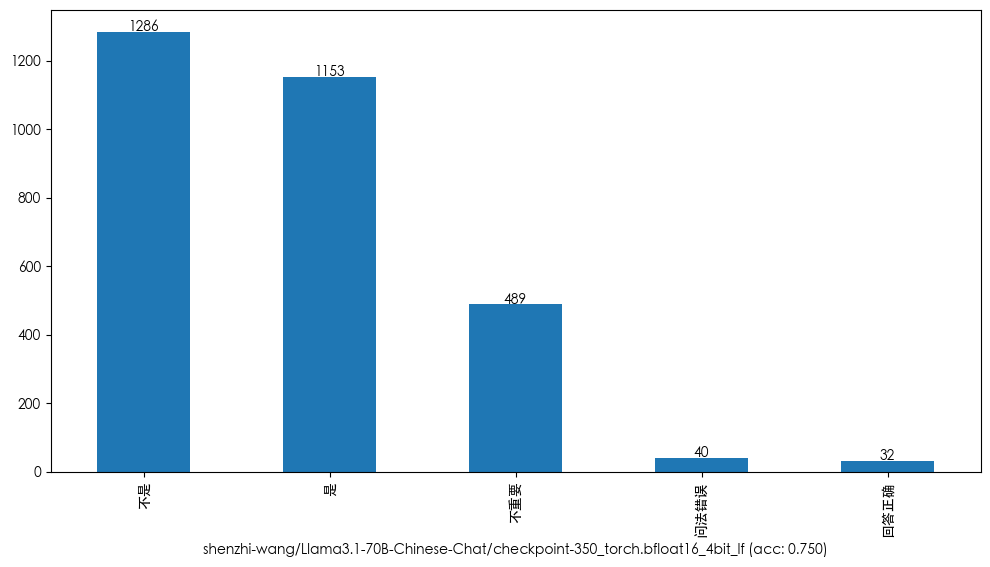

In [61]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")